In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
directory = os.path.join("output","no_awareness")
file_list = os.listdir(directory)

In [18]:
data_list = [pd.read_csv(os.path.join(directory,filename),
                         delimiter=" ", names=["time","S","E","I","R","D"], index_col="time")
             for filename in file_list]

In [30]:
data = pd.concat(data_list, keys=file_list, names=["Run","t"]).reset_index(level=0)
data["Run"] = data["Run"].map(lambda s: s.rstrip(".txt")).astype(int)
data = data.pivot(columns="Run")
data.fillna(method="ffill", inplace=True)
data

S                                                          \
Run          0       1       2       3       4       5       6       7    
t                                                                         
0.000    9998.0  9998.0  9998.0  9998.0  9998.0  9998.0  9998.0  9998.0   
0.125    9998.0  9998.0  9998.0  9998.0  9998.0  9998.0  9998.0  9998.0   
0.250    9998.0  9998.0  9998.0  9998.0  9998.0  9997.0  9998.0  9998.0   
0.375    9998.0  9998.0  9998.0  9997.0  9998.0  9997.0  9998.0  9998.0   
0.500    9998.0  9998.0  9998.0  9997.0  9998.0  9997.0  9998.0  9998.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
114.500   650.0   600.0   557.0   596.0   651.0   614.0   645.0   545.0   
114.625   650.0   600.0   557.0   596.0   651.0   614.0   645.0   545.0   
114.750   650.0   600.0   557.0   596.0   651.0   614.0   645.0   545.0   
114.875   650.0   600.0   557.0   596.0   651.0   614.0   645.0   545.0   
115.000   650.0   600.0   557.0   596.0   651.0   614.0   645.0   545.0   

                         ...     D                                         \
Run          8       9   ...    90     91    92    93     94     95    96   
t                        ...                                                
0.000    9998.0  9998.0  ...   0.0    0.0   0.0   0.0    0.0    0.0   0.0   
0.125    9998.0  9998.0  ...   0.0    0.0   0.0   0.0    0.0    0.0   0.0   
0.250    9997.0  9998.0  ...   0.0    0.0   0.0   0.0    0.0    0.0   0.0   
0.375    9997.0  9998.0  ...   0.0    0.0   0.0   0.0    0.0    0.0   0.0   
0.500    9997.0  9998.0  ...   0.0    0.0   0.0   0.0    0.0    0.0   0.0   
...         ...     ...  ...   ...    ...   ...   ...    ...    ...   ...   
114.500   622.0   652.0  ...  99.0  119.0  94.0  77.0  103.0  105.0  82.0   
114.625   622.0   652.0  ...  99.0  119.0  94.0  77.0  103.0  105.0  82.0   
114.750   622.0   652.0  ...  99.0  119.0  94.0  77.0  103.0  105.0  82.0   
114.875   622.0   652.0  ...  99.0  119.0  94.0  77.0  103.0  105.0  82.0   
115.000   622.0   652.0  ...  99.0  119.0  94.0  77.0  103.0  105.0  82.0   

                           
Run        97    98    99  
t                          
0.000     0.0   0.0   0.0  
0.125     0.0   0.0   0.0  
0.250     0.0   0.0   0.0  
0.375     0.0   0.0   0.0  
0.500     0.0   0.0   0.0  
...       ...   ...   ...  
114.500  92.0  87.0  82.0  
114.625  92.0  87.0  82.0  
114.750  92.0  87.0  82.0  
114.875  92.0  87.0  82.0  
115.000  92.0  87.0  82.0  

[921 rows x 500 columns]

In [35]:
meandata = data.groupby(axis=1, level=0, sort=False).mean()
meandata

,S,E,I,R,D
t,,,,,
0.000,9998.00,0.00,2.00,0.00,0.00
0.125,9997.85,0.15,1.98,0.02,0.00
0.250,9997.60,0.39,1.95,0.06,0.00
0.375,9997.44,0.52,1.94,0.10,0.00
0.500,9997.24,0.69,1.95,0.12,0.00
...,...,...,...,...,...
114.500,593.68,0.00,0.01,9312.09,94.22
114.625,593.68,0.00,0.01,9312.09,94.22
114.750,593.68,0.00,0.01,9312.09,94.22


In [51]:
stddata = data.groupby(axis=1, level=0, sort=False).std()
stddata

,S,E,I,R,D
t,,,,,
0.000,0.000000,0.000000,0.000000,0.000000,0.000000
0.125,0.411329,0.411329,0.140705,0.140705,0.000000
0.250,0.696311,0.680092,0.261116,0.238683,0.000000
0.375,0.844710,0.810038,0.371184,0.301511,0.000000
0.500,1.035921,1.001968,0.457817,0.326599,0.000000
...,...,...,...,...,...
114.500,40.475427,0.000000,0.100000,39.285563,9.420137
114.625,40.475427,0.000000,0.100000,39.285563,9.420137
114.750,40.475427,0.000000,0.100000,39.285563,9.420137


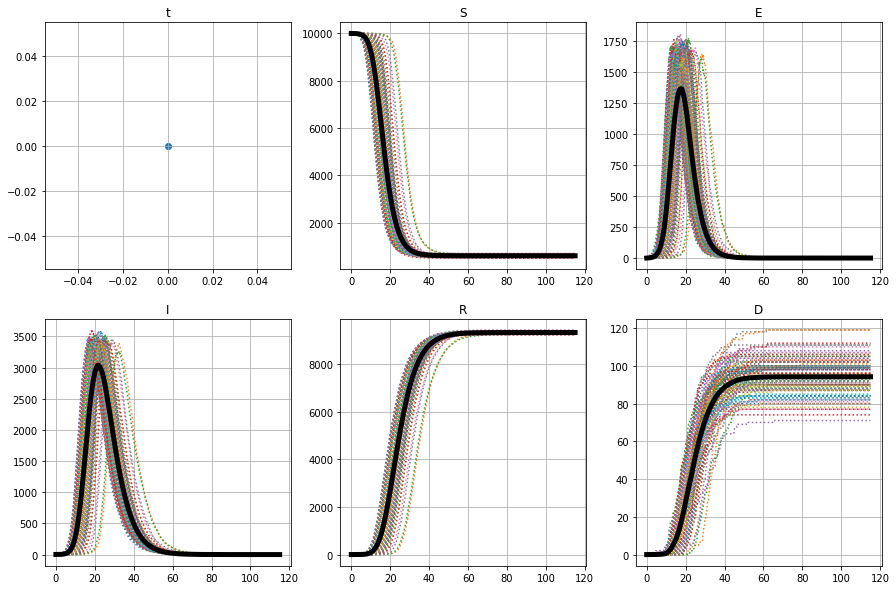

In [49]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i in range(len(file_list)):
    axs[1].plot(data["S"][i], linestyle=":")
    axs[1].fill_between()
    axs[2].plot(data["E"][i], linestyle=":")
    axs[3].plot(data["I"][i], linestyle=":")
    axs[4].plot(data["R"][i], linestyle=":")
    axs[5].plot(data["D"][i], linestyle=":")

axs[0].scatter(0,0)
axs[0].set_title("t")

axs[1].plot(meandata["S"], color="black", linewidth=5)
axs[1].set_title("S")
    
axs[2].plot(meandata["E"], color="black", linewidth=5)
axs[2].set_title("E")
    
axs[3].plot(meandata["I"], color="black", linewidth=5)
axs[3].set_title("I")
    
axs[4].plot(meandata["R"], color="black", linewidth=5)
axs[4].set_title("R")
    
axs[5].plot(meandata["D"], color="black", linewidth=5)
axs[5].set_title("D")
for ax in axs:
    ax.grid()